Fashion-MNIST 


Importing necessary libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

1.Importing datasets


In [2]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformations
transform = transforms.Compose([
    transforms.ToTensor(),  
    transforms.Normalize((0.5,), (0.5,))  # normalazing and standard deviation
])

# Loading the FashionMNIST datasets
train_data = datasets.FashionMNIST(
    root='./data',  # Saving the data on the "data" folder
    train=True,  # Train set
    download=True, 
    transform=transform
)

test_data = datasets.FashionMNIST(
    root='./data', 
    train=False,  # Test set
    download=True,
    transform=transform
)

#Create DataLoader for batching
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

print(f"size of train set: {len(train_data)}")
print(f"size of test set: {len(test_data)}")

size of train set: 60000
size of test set: 10000


Displaying before augmenting


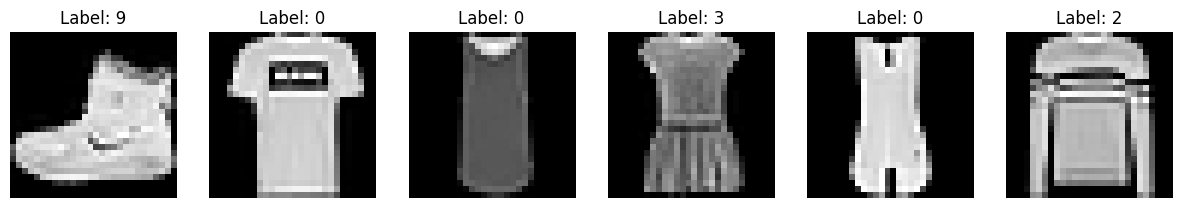

In [ ]:
import matplotlib.pyplot as plt

# Helper function to display images
def show_images(dataset, num_images=6):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        # Select a random image from the dataset
        img, label = dataset[i]
        # Convert the tensor image to a NumPy array for visualization
        img = img.numpy().transpose((1, 2, 0))  
        # Denormalize the image (reverse normalization)
        img = img * 0.5 + 0.5  # Assuming mean=0.5, std=0.5 in Normalize
        # Plot the image
        axes[i].imshow(img.squeeze(), cmap='gray')  # Use squeeze for single-channel grayscale images
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    plt.show()

#Shows train data before augments
show_images(train_data)


Augmenting the set


In [ ]:
# Augmented Transformations for Training Set
augmented_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),                # Randomly flip images horizontally
    transforms.RandomRotation(10),                   # Rotate images by up to 10 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Adjust brightness and contrast
    transforms.ToTensor(),                            # Convert to tensor
    transforms.Normalize((0.5,), (0.5,))             # Normalize
])

# Apply new transformations to the train dataset
augmented_train_data = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=False,  
    transform=augmented_transform
)

# Create a new DataLoader for the augmented training data
augmented_train_loader = DataLoader(augmented_train_data, batch_size=64, shuffle=True)

# Print size to verify
print(f"size of augmented train set: {len(augmented_train_data)}")


size of augmented train set: 60000


Displaying to check the augments


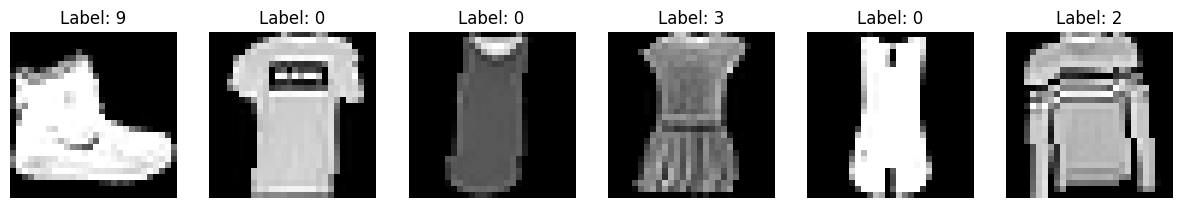

In [5]:
import matplotlib.pyplot as plt

# Helper function to display images
def show_images(dataset, num_images=6):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        # Select a random image from the dataset
        img, label = dataset[i]
        # Convert the tensor image to a NumPy array for visualization
        img = img.numpy().transpose((1, 2, 0))  # Change dimensions to HxWxC
        # Denormalize the image (reverse normalization)
        img = img * 0.5 + 0.5  # Assuming mean=0.5, std=0.5 in Normalize
        # Plot the image
        axes[i].imshow(img.squeeze(), cmap='gray')  # Use squeeze for single-channel grayscale images
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    plt.show()

# Display augmented images
show_images(augmented_train_data)


3.Model Building

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, dropout=0.5):  # Default dropout of 50%
        super(CNN, self).__init__()
        # First convolutional layer (1 input channel for grayscale)
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)  # Output size: 32x28x28
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # Output size: 32x14x14
        # Second convolutional layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)  # Output size: 64x14x14
        # Dropout layer to prevent overfitting
        self.dropout = nn.Dropout(dropout)
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Flattened feature map size = 64*7*7
        self.fc2 = nn.Linear(128, 10)  # Output size: 10 (number of classes)

    def forward(self, x):
        # Convolution and pooling layers
        x = self.pool(F.relu(self.conv1(x)))  # Apply Conv1 + ReLU + MaxPool
        x = self.pool(F.relu(self.conv2(x)))  # Apply Conv2 + ReLU + MaxPool
        # Flatten the feature maps
        x = x.view(-1, 64 * 7 * 7)  # Flatten into a vector
        # Fully connected layers with dropout
        x = F.relu(self.fc1(x))  # Apply FC1 + ReLU
        x = self.dropout(x)  # Apply dropout
        x = self.fc2(x)  # Apply FC2
        return x


4.Training + Plotting training and validation loss curves over epochs

In [7]:
# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the CNN model
model = CNN(dropout=0.3).to(device)

# Print the device being used
print(f"Using device: {device}")


Using device: cpu


Epoch [1/10]
Train Loss: 0.5774, Train Accuracy: 79.28%
Validation Loss: 0.3604, Validation Accuracy: 86.61%
Epoch [2/10]
Train Loss: 0.3866, Train Accuracy: 86.17%
Validation Loss: 0.2999, Validation Accuracy: 88.96%
Epoch [3/10]
Train Loss: 0.3317, Train Accuracy: 88.14%
Validation Loss: 0.2837, Validation Accuracy: 89.68%
Epoch [4/10]
Train Loss: 0.2976, Train Accuracy: 89.28%
Validation Loss: 0.2761, Validation Accuracy: 89.85%
Epoch [5/10]
Train Loss: 0.2719, Train Accuracy: 90.14%
Validation Loss: 0.2471, Validation Accuracy: 91.01%
Epoch [6/10]
Train Loss: 0.2268, Train Accuracy: 91.79%
Validation Loss: 0.2373, Validation Accuracy: 91.43%
Epoch [7/10]
Train Loss: 0.2190, Train Accuracy: 92.17%
Validation Loss: 0.2337, Validation Accuracy: 91.59%
Epoch [8/10]
Train Loss: 0.2120, Train Accuracy: 92.30%
Validation Loss: 0.2336, Validation Accuracy: 91.69%
Epoch [9/10]
Train Loss: 0.2079, Train Accuracy: 92.59%
Validation Loss: 0.2310, Validation Accuracy: 91.77%
Epoch [10/10]
Train

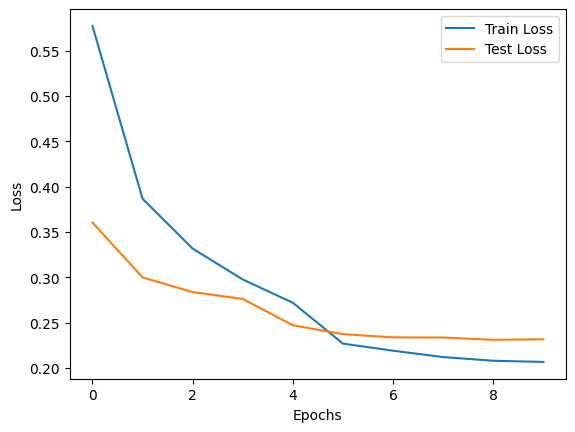

In [8]:
from torch.optim.lr_scheduler import StepLR
# Define Hyperparameters
learning_rate = 0.001
batch_size = 64
epochs = 10  

# Initialize the CNN model
model = CNN(dropout=0.5).to(device)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Learning Rate Scheduler
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)  # Reduce learning rate by a factor of 0.1 every 5 epochs

# Training Loop
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training Phase
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        
        optimizer.zero_grad() # Reset gradients
        
        
        outputs = model(inputs) # Forward pass
        
        # Compute the loss
        loss = criterion(outputs, labels)
        loss.backward()  # Backpropagation
        
        # Update the weights
        optimizer.step()
        
        # Track the running loss
        running_loss += loss.item()
        
        # Calculate the number of correct predictions
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    
    # Validation Phase
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # No gradient computation during validation
        test_loss = 0.0
        correct_test = 0
        total_test = 0
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(inputs)
            
            # Compute the loss
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            
            # Calculate the number of correct predictions
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)
        
        # Calculate accuracy
        train_accuracy = 100 * correct / total
        test_accuracy = 100 * correct_test / total_test
    
    # Update Learning Rate
    scheduler.step()

    # Store the losses
    train_losses.append(running_loss / len(train_loader))
    test_losses.append(test_loss / len(test_loader))

    # Print out the training and validation information
    print(f"Epoch [{epoch + 1}/{epochs}]")
    print(f"Train Loss: {running_loss / len(train_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%")
    print(f"Validation Loss: {test_loss / len(test_loader):.4f}, Validation Accuracy: {test_accuracy:.2f}%")

# After training, you can save the model if needed
# torch.save(model.state_dict(), 'fashion_mnist_cnn.pth')

# You can also plot the training and test loss if desired
plt.plot(range(epochs), train_losses, label='Train Loss')
plt.plot(range(epochs), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

5.Evaluation

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate the model
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
all_labels = []
all_preds = []

with torch.no_grad():  # Disable gradient calculation
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Calculate accuracy
accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')

# Classification Report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=test_data.classes))


Accuracy on the test set: 91.84%

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.87      0.87      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.87      0.89      0.88      1000
       Dress       0.91      0.92      0.92      1000
        Coat       0.87      0.86      0.86      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.76      0.73      0.75      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



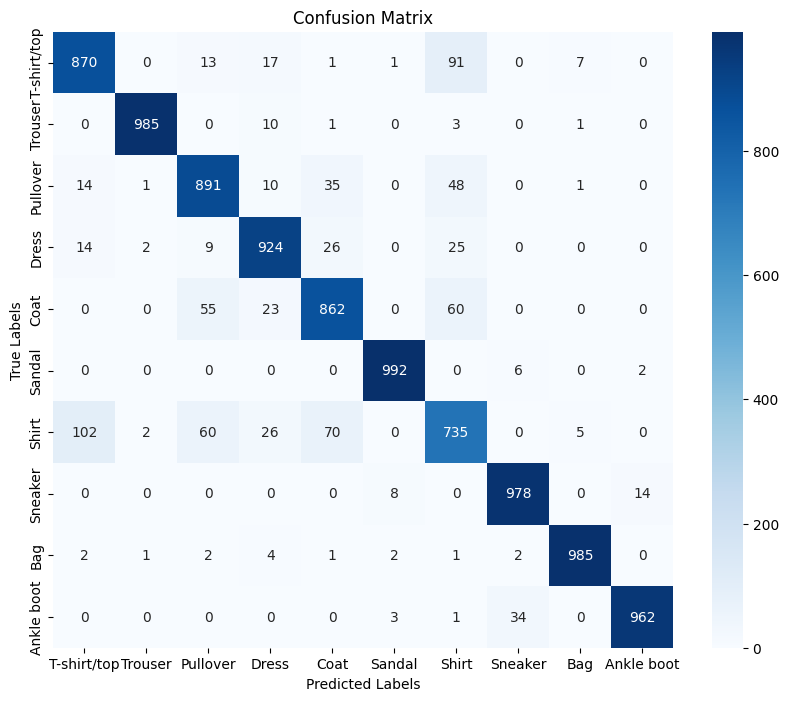

In [10]:
# Generate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.classes, yticklabels=test_data.classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


6.Visualization

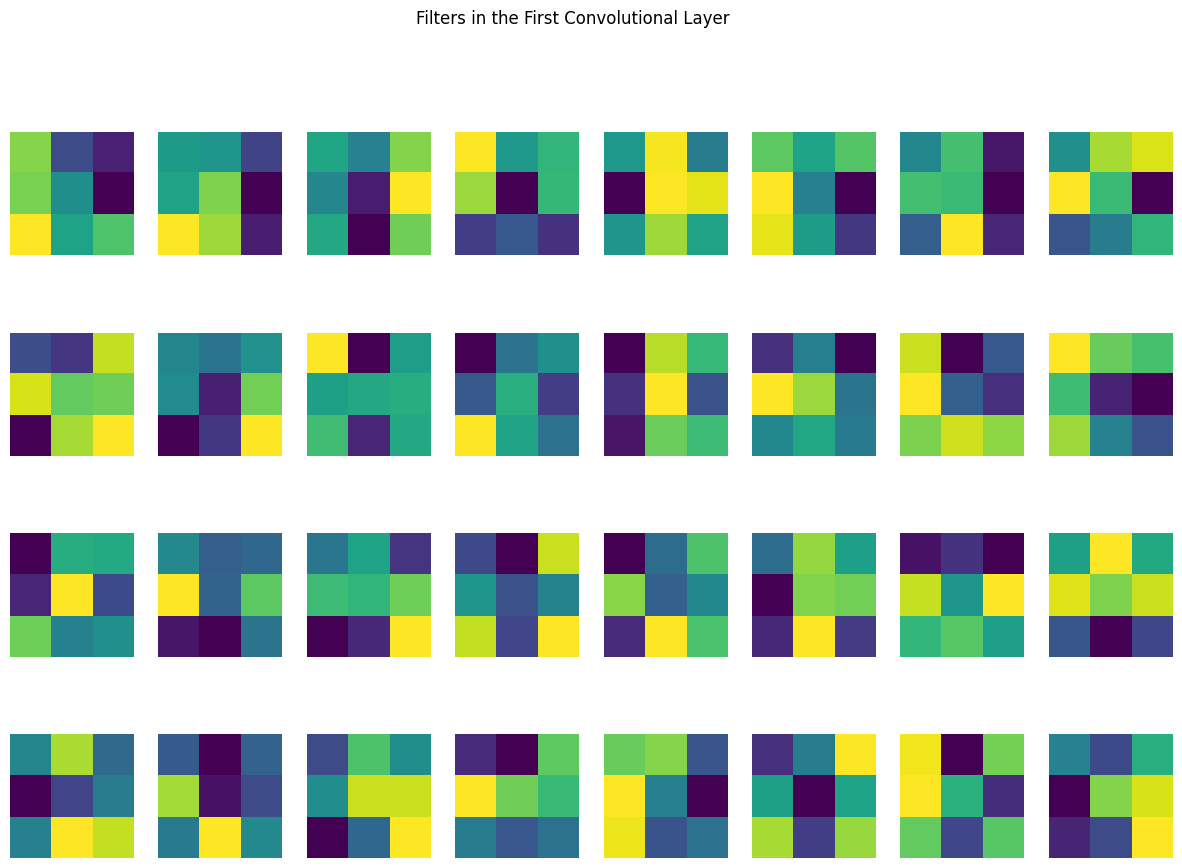

In [11]:
# Visualize the filters of the first convolutional layer
def visualize_filters(layer):
    filters = layer.weight.data.cpu().numpy()
    num_filters = filters.shape[0]
    
    plt.figure(figsize=(15, 10))
    for i in range(num_filters):
        plt.subplot(4, 8, i + 1)
        plt.imshow(filters[i, 0, :, :], cmap='viridis')
        plt.axis('off')
    plt.suptitle("Filters in the First Convolutional Layer")
    plt.show()

visualize_filters(model.conv1)  # Replace `conv1` with the actual name of your first Conv2D layer.


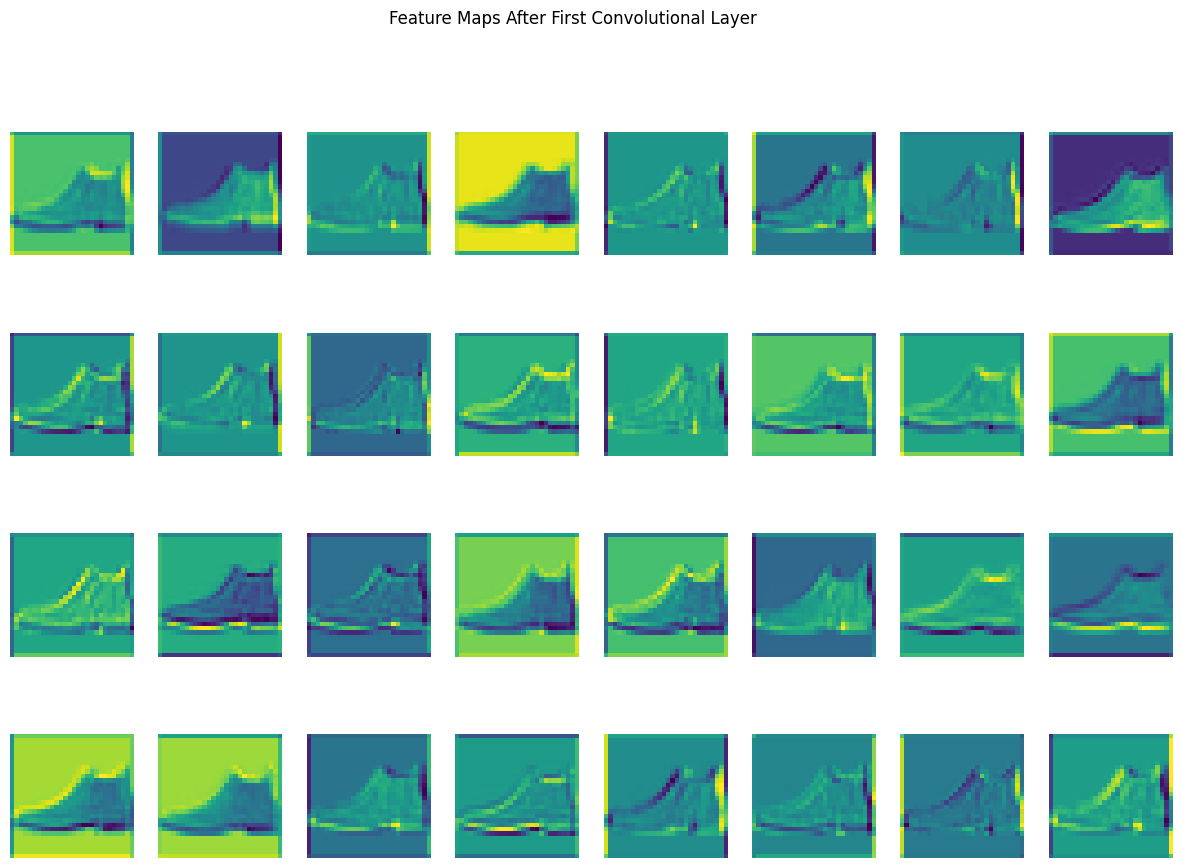

In [12]:
# Visualize feature maps for a sample image
def visualize_feature_maps(model, image):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        x = image.unsqueeze(0).to(device)  # Add batch dimension and move to device
        activations = model.conv1(x)  # Forward pass through the first convolutional layer
        
    # Convert activations to numpy for visualization
    feature_maps = activations.squeeze(0).cpu().numpy()
    num_maps = feature_maps.shape[0]
    
    plt.figure(figsize=(15, 10))
    for i in range(num_maps):
        plt.subplot(4, 8, i + 1)
        plt.imshow(feature_maps[i], cmap='viridis')
        plt.axis('off')
    plt.suptitle("Feature Maps After First Convolutional Layer")
    plt.show()

# Pass a sample image
sample_image, _ = test_data[0]
visualize_feature_maps(model, sample_image)


7.Hyperparameter Tuning:


In [24]:
# Define hyperparameter grid
learning_rates = [0.01, 0.001]
max_epochs = [5, 10]
dropouts = [0.3, 0.5]
optimizers = [optim.Adam, optim.SGD]

# Convert data to tensors
X_train = torch.stack([data[0] for data in train_data])
y_train = torch.tensor([data[1] for data in train_data])

X_test = torch.stack([data[0] for data in test_data])
y_test = torch.tensor([data[1] for data in test_data])

# Store results
results = []

for lr in learning_rates:
    for epochs in max_epochs:
        for dropout in dropouts:
            for opt in optimizers:
                print(f"Testing configuration: lr={lr}, epochs={epochs}, dropout={dropout}, optimizer={opt.__name__}")
                model = CNN(dropout=dropout).to(device)
                optimizer = opt(model.parameters(), lr=lr)
                criterion = nn.CrossEntropyLoss()
                
                # Training loop
                for epoch in range(epochs):
                    model.train()
                    optimizer.zero_grad()
                    outputs = model(X_train.to(device))
                    loss = criterion(outputs, y_train.to(device))
                    loss.backward()
                    optimizer.step()
                
                # Evaluation
                model.eval()
                with torch.no_grad():
                    outputs = model(X_test.to(device))
                    predictions = torch.argmax(outputs, axis=1)
                    accuracy = (predictions == y_test.to(device)).float().mean().item()
                
                # Log results
                results.append({
                    "lr": lr,
                    "epochs": epochs,
                    "dropout": dropout,
                    "optimizer": opt.__name__,
                    "accuracy": accuracy
                })

# Display results
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


Testing configuration: lr=0.01, epochs=5, dropout=0.3, optimizer=Adam
Testing configuration: lr=0.01, epochs=5, dropout=0.3, optimizer=SGD
Testing configuration: lr=0.01, epochs=5, dropout=0.5, optimizer=Adam
Testing configuration: lr=0.01, epochs=5, dropout=0.5, optimizer=SGD
Testing configuration: lr=0.01, epochs=10, dropout=0.3, optimizer=Adam
Testing configuration: lr=0.01, epochs=10, dropout=0.3, optimizer=SGD
Testing configuration: lr=0.01, epochs=10, dropout=0.5, optimizer=Adam
Testing configuration: lr=0.01, epochs=10, dropout=0.5, optimizer=SGD
Testing configuration: lr=0.001, epochs=5, dropout=0.3, optimizer=Adam
Testing configuration: lr=0.001, epochs=5, dropout=0.3, optimizer=SGD
Testing configuration: lr=0.001, epochs=5, dropout=0.5, optimizer=Adam
Testing configuration: lr=0.001, epochs=5, dropout=0.5, optimizer=SGD
Testing configuration: lr=0.001, epochs=10, dropout=0.3, optimizer=Adam
Testing configuration: lr=0.001, epochs=10, dropout=0.3, optimizer=SGD
Testing configu